In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import matplotlib.ticker as mtick
from scipy.stats.stats import pearsonr 
from sklearn.linear_model import LinearRegression
from scipy import stats

In [38]:
# AN AXIAL-FLOW CENTRIFUGAL GAS BUBBLE SEPARATOR [Gabbard, 1974]
# The separation efficiency at design flow rates varied between 80% and 95% depending
# on the bubble diameter and test fluid.
eps_es = 0.95      # [-], assume separator can remove 95%, worst case scenario, two loops, two separators
#eps_es = 0.95*0.5  # [-], assume separator can remove 95%, worst case scenario, one separator broken
Q_He = 0.24       # m3/s 0.281 for worst case when 1 separator broken (target 0.7% void)
# Target void %  0.2 < alpha < 0.7
d_b = 0.508e-3 # m  , 0.02 in [Peebles, 1968] (0.020in[Robertson, 3.9.1])
V_salt = 44.35305  # [m3]

V_b = (4/3)*math.pi* (d_b/2)**3
B_he = Q_He/V_b   # bubbles/sec
print(V_b)
print("He bubbles in the pipeline contactor %e bubbles/s" %B_he)
# Formula for dissertation: sum 1.456835e+09*(1-0.9)^n, n=1 to infinity
he = 0.0 # number of bubbles in the salt at the beginning
dt = 1  # s
for i in range(1, 50):  # iterate over seconds
    t = dt*i
    he = (he+B_he*dt)*(1-eps_es)   # 95% of bubbles are being removed by centrifugal separator every second
    print("Time %fs; %e bubbles in the salt; void fraction is %f %%" %(t,he/dt, 100*he*V_b/V_salt/dt))

6.864197316840768e-11
He bubbles in the pipeline contactor 3.496403e+09 bubbles/s
Time 1.000000s; 1.748201e+08 bubbles in the salt; void fraction is 0.027056 %
Time 2.000000s; 1.835612e+08 bubbles in the salt; void fraction is 0.028408 %
Time 3.000000s; 1.839982e+08 bubbles in the salt; void fraction is 0.028476 %
Time 4.000000s; 1.840201e+08 bubbles in the salt; void fraction is 0.028479 %
Time 5.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 6.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 7.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 8.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 9.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 10.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 11.000000s; 1.840212e+08 bubbles in the salt; void fraction is 0.028480 %
Time 12.000000s; 1.840212e+08 bubbles in the salt; void fr

In [54]:
rho_salt = 4.9602  # g/cc
rho_he = 5.26e-5   # g/cc at T=900K
void_percent = 0.011867/100  # fraction of 0.011867% see above
#void_percent = 0.2/100  # fraction of 0.2% see above
#void_percent = 0.5/100  # fraction of 0.5% see above
#void_percent = 1.0/100  # fraction of 0.1% see above


#void_percent = np.arange(0, 1.1, 0.1)/100
print(100*void_percent)
rho_mix = (1-void_percent)*rho_salt + void_percent * rho_he

print("Density of the salt+He bubbles [g/cm3]", rho_mix)
print("2004.09c -%.14e" %(rho_he*void_percent/rho_salt))

0.011867
Density of the salt+He bubbles [g/cm3] 4.9596113793080425
2004.09c -1.25842546671505e-09


In [55]:
vol_salt_0 = 4.435305E+7
m_salt_0 = vol_salt_0*rho_salt
m_void = m_salt_0 + rho_he*vol_salt_0*void_percent

print("New mass of the salt with He in it %f t" %(1e-6*m_void))
print("New volume to conserve mass %e cc" %(m_void/rho_mix))

New mass of the salt with He in it 219.999999 t
New volume to conserve mass 4.435831e+07 cc


<IPython.core.display.Javascript object>


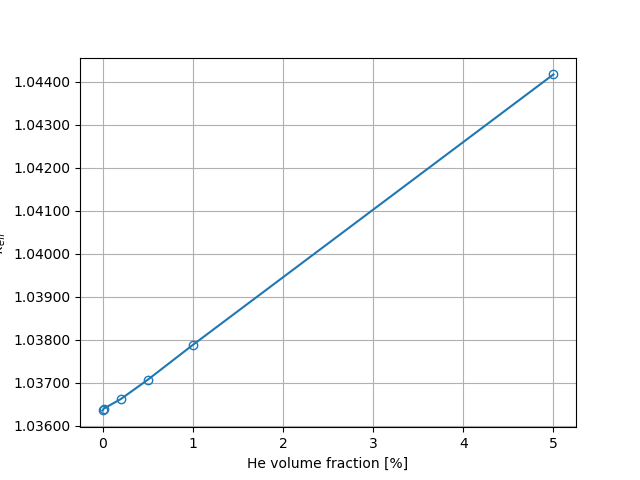

In [4]:
void_percent = [0, 0.011867, 0.2, 0.5, 1, 5]   # [%]
keff = [1.03636, 1.03640, 1.03662, 1.03707, 1.03788, 1.04417]
keff_std = [7, 6, 6, 7, 7]

# Initialize figure
fig_3 = matplotlib.pyplot.figure(3)
ax = fig_3.add_subplot(111)
ax.grid(True)
ax.plot(void_percent, keff, 'o-', linewidth=1.5, markerfacecolor="None")
ax.set_ylabel(r'$k_{eff}$')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax.set_xlabel(r'He volume fraction [%]')
#ax.set_xlim(0, 1)
#ax.set_ylim(1.036, 1.038)
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.legend(loc=0)

fig_3.show()

## Void coefficent calculator from Serpent output

LinregressResult(slope=0.0016009090909091224, intercept=1.0362704545454549, rvalue=0.996490961479956, pvalue=5.230915064653692e-11, stderr=4.482288376587027e-05)


<IPython.core.display.Javascript object>


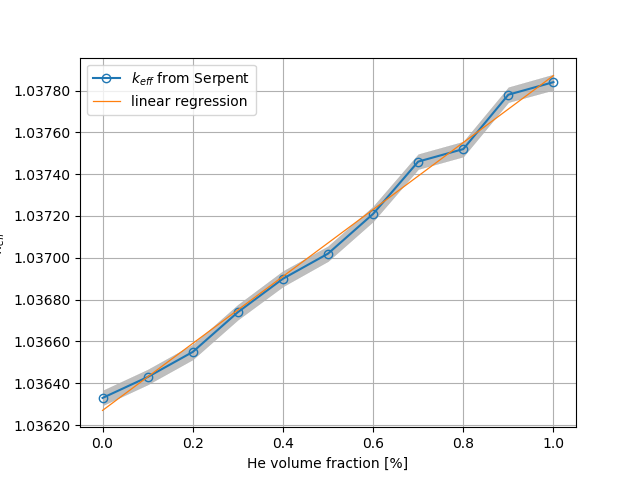

From Serpent $\alpha_v$ = 151.00 +/- 4.80 pcm/void%
Smoothed using linear regression $\alpha_v$ = 160.090909 pcm/void%


In [41]:
def read_coe_k (filename):
    keff = []
    err = []
    void_perc = []
    with open(filename) as openfile:
        for line in openfile:
            if line.startswith('IMP_KEFF '):
                keff.append(float(line.split(' ')[-2].strip()))
                err.append(float(line.split(' ')[-1].strip()))
            if 'VOID ' in line:
                void_perc.append(float(line.split(' ')[-1].strip()))
    return np.array(keff), np.array(err), np.array(void_perc)


coe_file_1 = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/void/tap_void_study.coe'

keff, keff_std, void_percent = read_coe_k(coe_file_1)

av_r = stats.linregress(void_percent, keff)
print(av_r)

# Initialize figure
fig_4 = matplotlib.pyplot.figure(4)
ax = fig_4.add_subplot(111)
ax.grid(True)
ax.plot(void_percent, keff, 'o-', linewidth=1.5, markerfacecolor="None", label=r'$k_{eff}$ from Serpent')
ax.plot(void_percent, av_r.intercept + av_r.slope * void_percent, linewidth=0.9, label=r'linear regression')
ax.fill_between(void_percent, keff-keff_std, keff+keff_std, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.set_ylabel(r'$k_{eff}$')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax.set_xlabel(r'He volume fraction [%]')
#ax.set_xlim(0, 1)
#ax.set_ylim(1.036, 1.038)
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.legend(loc=0)
fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/void_coeff_regression.png',bbox_inches='tight', dpi=700)
sim_a_v = 1e5*(keff[-1]-keff[0])/(void_percent[-1]-void_percent[0])
sim_a_v_std = 1e+5*math.sqrt(keff_std[0]**2/keff[0]**4 + keff_std[-1]**2/keff[-1]**4) * \
            abs(1/(void_percent[-1]-void_percent[0]))

print(r'From Serpent $\alpha_v$ = %.2f +/- %.2f pcm/void%%' %(sim_a_v, sim_a_v_std))
print(r'Smoothed using linear regression $\alpha_v$ = %f pcm/void%%' %(1e5*av_r.slope))
